In [2]:
import math
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [3]:
sigma = lambda z :  1 / (1 - z + z ** 2 / 2) if z >= 0 else (1 + z + z ** 2 / 2)/(1 + z + z ** 2 / 2 + z ** 3 / 6)
sigmareal = lambda z : 1 / (1 + math.exp(-z))

# Генерация тестовой выборки

In [4]:
m = 3000000
n = 30
w = np.array([0.69, 6.61, 7.42, 4.41, 9.23, 2.98, 6.34, 0.61, 8.15, 1.37, 5.01, 0.76, 2.14, 8.2, 9.52, 5.76, 1.1, 3.14, 8.14, 5.31, 9.75, 1.82, 4.82, 2.79, 9.48, 1.34, 7.38, 8.99, 1.59, 8.75])
random.seed(13371337)
testdata = [[random.gauss() / 40 for _ in range(n)] for _ in tqdm(range(m))]

100%|██████████| 3000000/3000000 [01:10<00:00, 42269.25it/s]


In [5]:
test = [1 if sigmareal(np.array(testdata[i]).dot(w)) >= 0.60 else 0 for i in tqdm(range(m))]

100%|██████████| 3000000/3000000 [00:12<00:00, 241936.84it/s]


# Перцептрон

In [33]:
m = 1000000
M = m // 4
n = 30

In [34]:
#T = np.ndarray(shape=(m,1))
T = np.array(test[:M])

In [35]:
W = 10 * np.array([1 for _ in range(30)])
b = 10

In [36]:
X = np.array(testdata[:M])

In [37]:
Y = np.array(list(map(lambda x : sigmareal(x), X.dot(W) + b)))
Y

array([0.99996793, 0.999949  , 0.99982807, ..., 0.99999119, 0.99999512,
       0.99982616])

In [38]:
J = - (1 / M) * sum([y[0] * math.log(y[1]) + (1 - y[0]) * math.log(1 - y[1]) for y in zip(T, Y)])
print(J)

6.482108694537746


# Обучение

In [39]:
epochJ = []
epochAcc = []

In [65]:
for epoch in tqdm(range(1)):
    gradJ = (1 / M) * (Y - T).dot(X)
    norm = np.linalg.norm(gradJ)
    gradJ /= norm
    db = 1 / M * np.sum(Y - T)
    db /= norm
    W = np.add(W, -0.1*gradJ)
    b -= 0.1*db
    Y = np.array(list(map(lambda x : sigmareal(x), X.dot(W) + b)))
    if epoch % 10 == 0:
      J = - (1 / M) * sum([y[0] * math.log(y[1]) + (1 - y[0]) * math.log(1 - y[1]) for y in zip(T, Y)])
      epochJ.append(J)
      epochAcc.append(sum(1 if (T[i] == (Y[i] >= 0.6)) else 0 for i in range(M)) / (M))


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


In [68]:
J = - (1 / M) * sum([y[0] * math.log(y[1]) + (1 - y[0]) * math.log(1 - y[1]) for y in zip(T, Y)])
Acc = sum(1 if (T[i] == (Y[i] >= 0.21)) else 0 for i in range(M)) / (M)
print(J)
print(Acc)

0.482732623863067
0.852884


In [69]:
Ytest = np.array(list(map(lambda x : sigmareal(x), np.array(testdata[2*m:3*m]).dot(W) + b)))
testtest = test[2*m:3*m]
Jtest = - (1 / m) * sum([y[0] * math.log(y[1]) + (1 - y[0]) * math.log(1 - y[1]) for y in zip(np.array(test[2*m:3*m]), Ytest)])
Acctest = sum(1 if ((testtest)[i] == (Ytest[i] >= 0.21)) else 0 for i in range(m)) / m
print(Jtest)
print(Acctest)

0.48198599286211496
0.853512


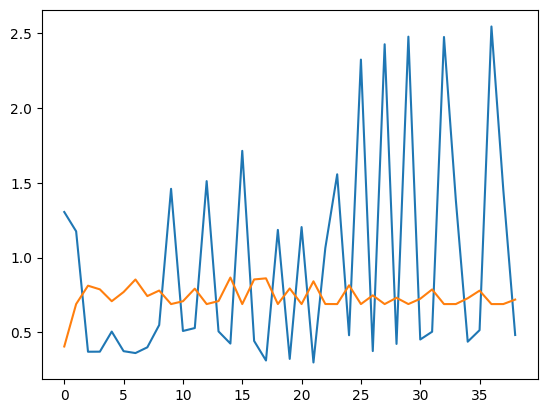

In [70]:
plt.plot(np.array(epochJ))
plt.plot(np.array(epochAcc))